## Rider Sentiment Analysis


# After webscraping the data, we will perform sentiment analysis on the reviews of the riders.
#### The data is collected from various sources including:
- https://www.reddit.com/r/transit/comments/1bt9yng/the_chicago_l_is_an_american_treasure/
- https://www.reddit.com/r/cta/comments/1dwa1w5/how_bad_is_the_cta_really_compared_to_other_cities/
- https://www.tripadvisor.com/ShowUserReviews-g35805-d549354-r491931481-Chicago_Transit_Authority_CTA-Chicago_Illinois.html
- https://www.yelp.com/biz/chicago-transit-authority-chicago-6
#### Employee reviews from:
https://www.indeed.com/cmp/Chicago-Transit-Authority/reviews




In [15]:
import pandas as pd
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests

In [16]:

# Webscraping the data from reddit

def get_reddit_comments(url):
    """
    Function to get reddit comments from a given url
    """
    # Send a GET request to the URL
    response = requests.get(url, headers={'User-Agent': 'Chrome/58.0.3029.110'})
    # Find all the comments in the post
    data = response.json()

    comments_body1 = [
        comment['data']['body']
        for comment in data[1]['data']['children']
        if 'body' in comment['data']
    ]
    return comments_body1

# Define the URLS
reddit_urls = [
    'https://www.reddit.com/r/transit/comments/1bt9yng/the_chicago_l_is_an_american_treasure/.json',
    'https://www.reddit.com/r/cta/comments/1dwa1w5/how_bad_is_the_cta_really_compared_to_other_cities/.json',
    'https://www.reddit.com/r/cta/comments/1gjox52/what_is_in_your_opinion_the_worst_designed_cta_l/.json',
    'https://www.reddit.com/r/chicago/comments/1fsb9gn/cta_l_operator_here_ask_me_anything/.json',
    'https://www.reddit.com/r/cta/comments/1brrg0t/the_sorry_state_of_the_cta_a_frustration_vent/.json',
    'https://www.reddit.com/r/chicago/comments/1izhwpa/the_cta_is_so_vexing/.json'
]
# join get_reddit_comments(rdt_url) and get_reddit_comments(rdt_url2)
comments_body = []
for url in reddit_urls:
    comments_body.extend(get_reddit_comments(url))



print(len(comments_body))
# Store the post & comments in a list

# Convert the list to a dataframe
reddit_df = pd.DataFrame(comments_body, columns=['comment'])

# display(reddit_df)

200


In [17]:



# Do some sentiment analysis on the comments with nltk
nltk.download('all')

# Do the same for the other sources
def preprocess_text(text):
    # tokenize the text
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Join the tokens into one string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

reddit_df['processed_comment'] = reddit_df['comment'].apply(preprocess_text)
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

reddit_df['sentiment'] = reddit_df['comment'].apply(get_sentiment)
display(reddit_df)



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[

,comment,processed_comment,sentiment
0,I love it. It's like a museum artifact that do...,love . 's like museum artifact double transit ...,1
1,"It needs to be upgraded, with an economy bigge...","need upgraded , economy bigger country earth C...",1
2,I had a higher opinion of the L before I had t...,higher opinion L ride .,0
3,Perhaps it could be intriguing to preserve one...,Perhaps could intriguing preserve one station ...,1
4,"Is that Clark/Lake station?\n\nYeah, I love th...","Clark/Lake station ? Yeah , love L. go Chicago...",1
...,...,...,...
195,Maybe finding a metra stop nearby could help y...,Maybe finding metra stop nearby could help mea...,1
196,ive been taking CTA for 10 years almost everyd...,ive taking CTA 10 year almost everyday northsi...,1
197,Another childish post from someone who just ca...,Another childish post someone ca n't leave lit...,1
198,Leave earlier,Leave earlier,0


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(reddit_df['sentiment'], reddit_df['sentiment']))
print(classification_report(reddit_df['sentiment'], reddit_df['sentiment']))

[[ 59   0]
 [  0 141]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00       141

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



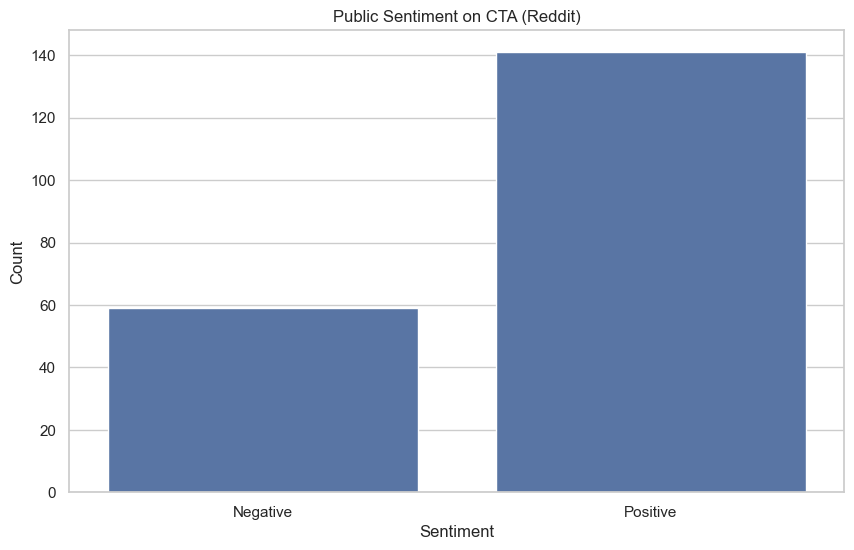

In [21]:

# graph the sentiment
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='sentiment', data=reddit_df)
plt.title('Public Sentiment on CTA (Reddit)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()